In [1]:
from utils_excel import read_log_databaseloader as databaseloader
import numpy as np
from utils_calculation import calculator

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
check_line_list = [3,23,43,63,183]
save_root_path = 'statistics_figure_float32_pruning/'
rld = databaseloader()
table_lenght = len(check_line_list)-1
c = calculator()


In [2]:
def get_parameter_number(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_parameter_number,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[7.1777, 10.3957, 14.5328, 16.9452, 25.557]
[0.0, 0.0, 0.0, 0.0, 0.0]
[7.177700000000001, 10.395700000000001, 14.532800000000002, 16.945200000000003, 25.557000000000002]
[0.0, 0.0, 0.0, 0.0, 0.0]


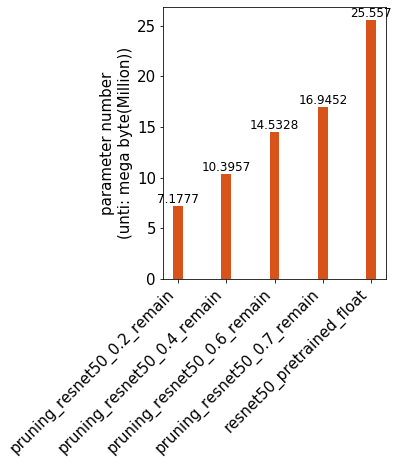

In [3]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_parameter_number(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

bar_width = 0.2
bar = plt.bar(x, model_geo_mean_list, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('parameter number\n(unti: mega byte(Million))',fontsize=15)
plt.savefig(save_root_path + "parameter number.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [4]:
def get_GFLOPs(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_GFLOPs,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[0.94, 1.51, 2.23, 2.65, 4.14]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.94, 1.51, 2.23, 2.65, 4.14]
[0.0, 0.0, 0.0, 0.0, 0.0]


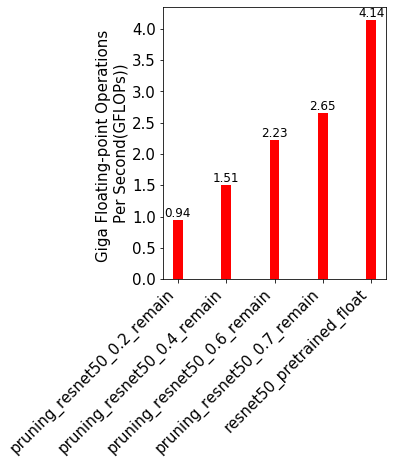

In [5]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_GFLOPs(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

bar_width = 0.2
bar = plt.bar(x, model_geo_mean_list, bar_width, color="red")

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Giga Floating-point Operations \nPer Second(GFLOPs))',fontsize=15)
plt.savefig(save_root_path + "GFLOPs.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [6]:
def get_cuda_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_cuda_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[989.95233, 1028.4344, 1082.3094, 1115.0192, 1016.88983]
[0.0, 0.0, 0.0, 0.0, 1.1368683772161603e-13]
[989.9523494957506, 1028.4344622069557, 1082.3094200026428, 1115.019215807167, 1016.8898283935941]
[0.0, 0.0, 0.0, 0.0, 1.1368683772161603e-13]


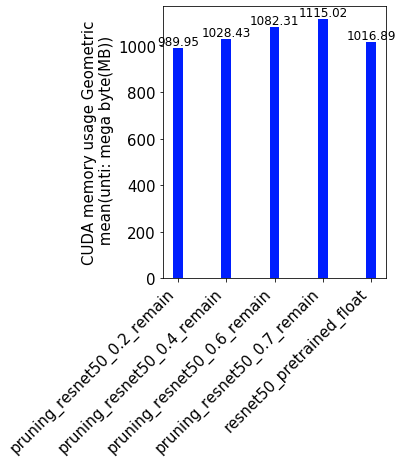

In [7]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_cuda_memory_usage_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

bar_width = 0.2
bar = plt.bar(x, model_geo_mean_list, bar_width, color=(0/256, 30/256, 255/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 2), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('CUDA memory usage Geometric\n mean(unti: mega byte(MB))',fontsize=15)
plt.savefig(save_root_path + "CUDA memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [8]:
def get_host_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_host_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[2210.3281, 2211.0754, 2216.546, 2217.1995, 2203.8032]
[1.1586701500327763, 1.127501861192286, 1.4959161759475137, 2.011123437239803, 1.1918703221244868]
[2210.325996199477, 2211.073374250061, 2216.542359377798, 2217.1930102397473, 2203.801059044146]
[1.2180382140541042, 1.1852729211245787, 1.572564087608498, 2.1141695931910363, 1.252939500084267]


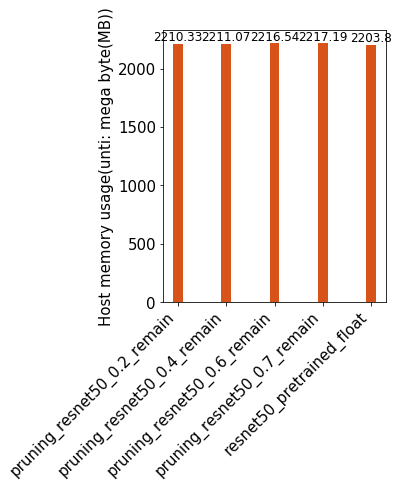

In [9]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_host_memory_usage_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

bar_width = 0.2
bar = plt.bar(x, model_geo_mean_list, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 2), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Host memory usage(unti: mega byte(MB))',fontsize=15)
plt.savefig(save_root_path + "Host memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [10]:
def get_storage_usage(estimate_line_list = []):# need to fill up all the size parameters
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_size,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[54.9, 79.5, 111.0, 129.0, 97.7]
[0.0, 0.0, 0.0, 0.0, 0.0]
[54.90000000000001, 79.50000000000001, 111.00000000000003, 129.00000000000003, 97.70000000000003]
[0.0, 0.0, 0.0, 0.0, 0.0]


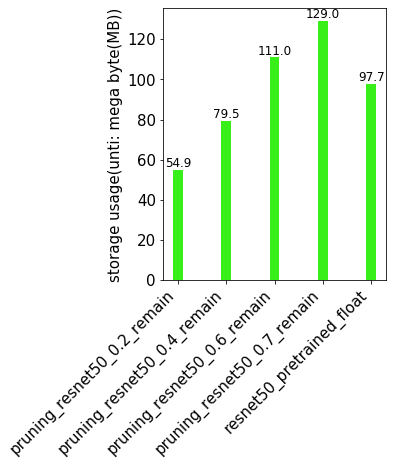

In [11]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_storage_usage(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

bar_width = 0.2
bar = plt.bar(x, model_geo_mean_list, bar_width, color=(57/256, 240/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('storage usage(unti: mega byte(MB))',fontsize=15)
plt.savefig(save_root_path + "storage usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [12]:
def get_inference_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Inference_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[0.33882836, 0.33468914, 0.33680376, 0.33448085, 0.3359144]
[0.0018916004164926115, 0.0013851760013192105, 0.004848855392010132, 0.0019045332832142714, 0.0027825141921564156]
[0.338791763333723, 0.3346690772191903, 0.3365709477734999, 0.33444303909809925, 0.3358364302616393]
[0.00198852243923181, 0.0014561497961688707, 0.0050973015587935655, 0.0020021179615500873, 0.0029250849494120157]


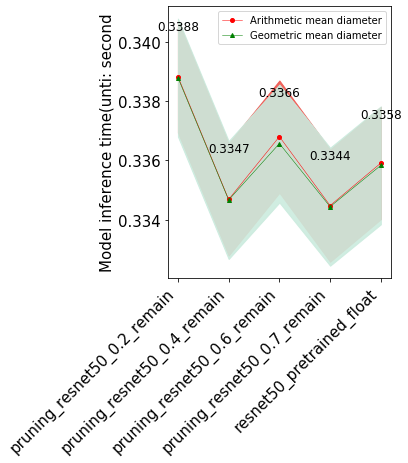

In [13]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_inference_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter", "Geometric mean diameter"], loc='upper right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Model inference time(unti: second',fontsize=15)
plt.savefig(save_root_path + "Model inference time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [14]:
def get_running_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_running_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[1041.2643, 945.49133, 771.47394, 750.7367, 664.1389]
[64.18970425554994, 51.97098063286114, 15.597958711691376, 21.664212708007085, 23.68143269022096]
[1027.5005430826704, 935.5983315854479, 770.3485687839595, 748.5500021275964, 661.3772854846867]
[67.47866312933559, 54.633875249905714, 16.39716857428118, 22.774245936169564, 24.894824449752605]


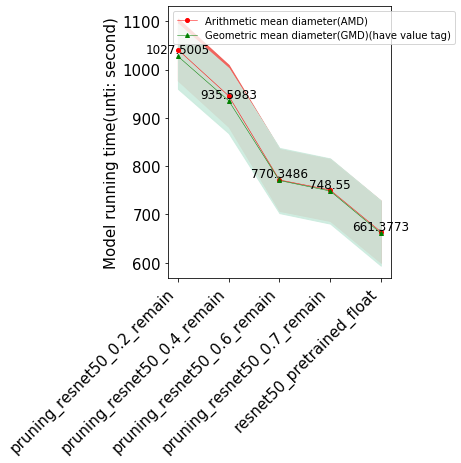

In [15]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_running_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Model running time(unti: second)',fontsize=15)
plt.savefig(save_root_path + "Model running time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [16]:
def get_Top1_accuracy_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Top1_Accuracy,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[69.378, 72.912, 74.58, 75.204, 76.13]
[0.0, 0.0, 0.0, 0.0, 1.4210854715202004e-14]
[69.37800000000001, 72.91200000000002, 74.58000000000001, 75.20400000000001, 76.13000000000001]
[0.0, 0.0, 0.0, 0.0, 1.4210854715202004e-14]


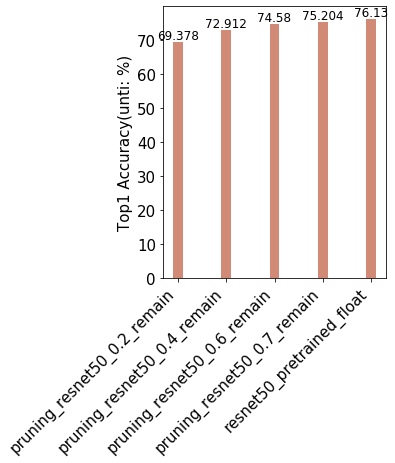

In [17]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_Top1_accuracy_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

bar_width = 0.2
bar = plt.bar(x, model_geo_mean_list, bar_width, color=(210/256, 139/256, 118/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Top1 Accuracy(unti: %)',fontsize=15)
plt.savefig(save_root_path + "Top1 Accuracy.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [18]:
def get_Top5_accuracy_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Top5_Accuracy,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[89.156, 91.112, 92.174, 92.396, 92.862]
[0.0, 0.0, 0.0, 0.0, 0.0]
[89.15600000000003, 91.11200000000002, 92.17400000000004, 92.39600000000002, 92.86200000000002]
[0.0, 0.0, 0.0, 0.0, 0.0]


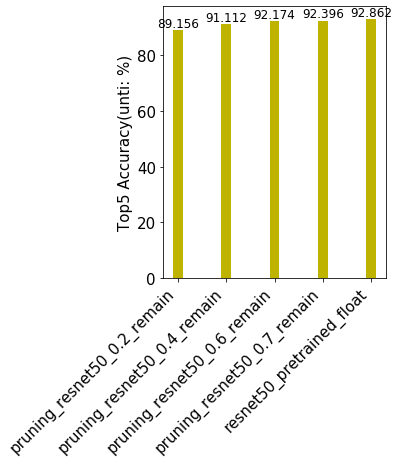

In [19]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_Top5_accuracy_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

bar_width = 0.2
bar = plt.bar(x, model_geo_mean_list, bar_width, color=(191/256, 181/256, 0/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Top5 Accuracy(unti: %)',fontsize=15)
plt.savefig(save_root_path + "Top5 Accuracy.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [20]:
def get_crossentropy_loss_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_cross_entropy_loss,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[0.00618194, 0.00541265, 0.00506431, 0.00493012, 0.00482849]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.006181939999999999, 0.005412649999999998, 0.005064309999999998, 0.004930119999999998, 0.004828489999999999]
[0.0, 0.0, 0.0, 0.0, 0.0]


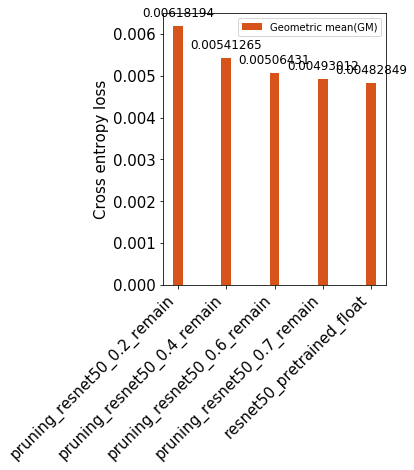

In [21]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_crossentropy_loss_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

bar_width = 0.2
bar = plt.bar(x, model_geo_mean_list, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.00015, round(b, 8), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Cross entropy loss',fontsize=15)
plt.savefig(save_root_path +"Cross entropy loss.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [22]:
def get_f1_score(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_F1_score,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[0.689938, 0.7259277, 0.7427464, 0.7494368, 0.7583254]
[0.001824822334220877, 0.0017412072001776746, 0.0016946535008388608, 0.0017029995595574388, 0.0016758524967381838]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0018249068668674952, 0.0017412878594561866, 0.0016947320035746484, 0.0017030784489141186, 0.0016759301285406611]


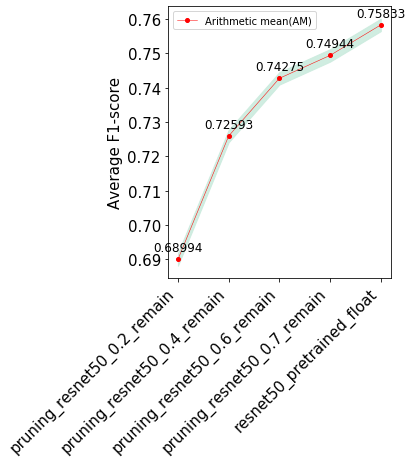

In [23]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_f1_score(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 5), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([line1], ["Arithmetic mean(AM)"], loc='upper left')
plt.ylabel('Average F1-score',fontsize=15)
plt.savefig(save_root_path + "Average F1-score.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [24]:
def get_precision_score(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_precision,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

In [25]:
def get_recall(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if 'quantization_models/resnet50_pretrained_float.pth' == model_path:
            current_model_name = 'resnet50_pretrained_float'
        else:    
            current_model_name = 'pruning_' + (model_path.split("ch_")[1]).split(".p")[0] + '_remain'   #  transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_recall,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['pruning_resnet50_0.2_remain', 'pruning_resnet50_0.4_remain', 'pruning_resnet50_0.6_remain', 'pruning_resnet50_0.7_remain', 'resnet50_pretrained_float']
[0.69378, 0.72912, 0.7458, 0.75204, 0.7613]
[0.0020515771841611574, 0.0019457938829620103, 0.0019087570170472912, 0.0018894621243557008, 0.0019029487995879668]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0020516722209468334, 0.0019458840194665655, 0.001908845437864725, 0.0018895496513609664, 0.0019030369513468929]
[0.6969834, 0.7322989, 0.7485525, 0.7550905, 0.7655472]


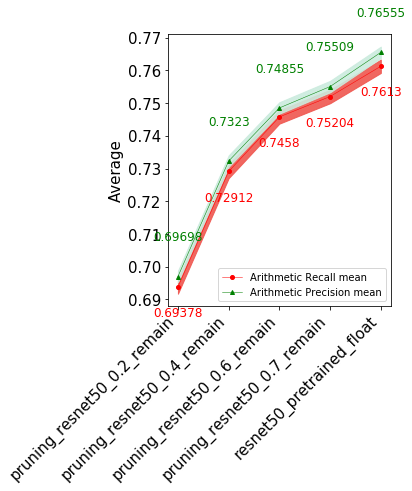

In [26]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_recall(check_line_list)
model_name_list1, model_mean_list1, model_mean_confinterval1, model_geo_mean_list1, model_geo_mean_confinterval1 = get_precision_score(check_line_list)

print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)
print(model_mean_list1)
x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,5))

# line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)

# plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)


line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_mean_list1, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_mean_list1 - model_mean_confinterval1[0], model_mean_list1 + model_mean_confinterval1[0], color=(204/256, 236/256, 223/256), alpha=0.9)


#show the bar spesific number
for x_axis, a, b, c in zip(x, x_lable, model_mean_list, model_mean_list1):
    plt.text(x_axis, b-0.01, round(b, 5), ha='center', va='bottom', fontsize=12, color='red')
    plt.text(x_axis, c+0.01, round(c, 5), ha='center', va='bottom', fontsize=12, color='green')


plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([line1,line2], ["Arithmetic Recall mean", "Arithmetic Precision mean"],loc = 'lower right' )
plt.ylabel('Average',fontsize=15)
plt.savefig(save_root_path + "Average Recall and Precision.png",dpi=500,bbox_inches = 'tight')
plt.show()